

---



* 작성자: 한양대ERICA, 산업경영공학과, 오요셉(yosepoh@hanyang.ac.kr)
* 마지막 수정일: 2023.04.15


---



- 돌릴때 하드웨어 가속기 GPU로 바꿀것
- 하루에 코랩 GPU할당량이 다 되면 커널이 죽을 수 있음

# (1) Preliminaries

In [ ]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 데이터 시각화 패키지
import matplotlib.pyplot as plt   

# 머신러닝 패키지
import tensorflow as tf 
from keras import layers   

# (2) Load the dataset 

In [ ]:
#fashion_MNIST 불러오기 
fashion_mnist = tf.keras.datasets.fashion_mnist

# 데이터를 훈련 세트와 테스트 세트로 분할
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() 

# 훈련 세트와 테스트 세트가 잘 분할되었는지 확인
print('train 데이터 수: ', len(X_train))
print('test 데이터 수: ', len(X_test))

4422102/4422102 [==============================] - 0s 0us/step
train 데이터 수:  60000
test 데이터 수:  10000


In [ ]:
# 데이터 전처리: 0에서 255 사이의 값을 갖는 훈련/테스트 데이터들을 0.0~1.0 사이의 값을 갖도록 변환
# min-max scaler임
X_train = X_train / 255.0
X_test = X_test / 255.0

# (3) Build the model

In [ ]:
# 모델 정의
model = tf.keras.models.Sequential([
  # input_shape -> 28*28 이미지임
  # Flatten으로 1차원으로 펴줌 -> 노드에 집어넣기 편한 형태로 변환해주는 작업임
  tf.keras.layers.Flatten(input_shape=(28,28)), 
  # 히든레이어 첫번째의 노드 갯수 64개
  tf.keras.layers.Dense(units = 64, activation='relu'), 
  # 오버피팅 잡아줌
  # Dropout 위치는 사용자가 오버피팅을 최대한 잡아주는 구간을 결정해서 넣음
  # 50% 확률로 랜덤하게 노드에 갈지말지 결정함
  tf.keras.layers.Dropout(0.5),
  # 히든레이어 두번째 노드수 32개
  tf.keras.layers.Dense(units = 32, activation='relu'),
  # Output 레이어를 클래스의 개수가 10개이므로 10으로 잡음
  # softmax함수로 다중 분류를 해줌
  tf.keras.layers.Dense(units = 10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 최적화 함수 정의하기
model.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy', 
              # 평가기준을 정확도도 넣음
              metrics=['accuracy'])  

# (4) Training

In [ ]:
%%time
# 하이퍼 파라미터를 튜닝해서 돌려볼 것
# 100 epoch에 대한 훈련을 실행하고 진행 과정 기록
history = model.fit(X_train, y_train, 
                    epochs = 100, 
                    # 데이터가 크기 때문에 batch_size를 설정하여 데이터를 묶어서 보고 y값을 업데이트를 함
                    # batch size를 크게하면 학습이 제대로 안될 수도 있음, 작게하면 학습 속도가 아주 낮음
                    batch_size=100,
                    validation_split=0.2)

Epoch 1/100
480/480 [==============================] - 9s 5ms/step - loss: 0.8712 - accuracy: 0.6894 - val_loss: 0.5068 - val_accuracy: 0.8170
Epoch 2/100
480/480 [==============================] - 2s 4ms/step - loss: 0.5738 - accuracy: 0.7953 - val_loss: 0.4411 - val_accuracy: 0.8436
Epoch 3/100
480/480 [==============================] - 2s 3ms/step - loss: 0.5199 - accuracy: 0.8148 - val_loss: 0.4131 - val_accuracy: 0.8489
Epoch 4/100
480/480 [==============================] - 2s 3ms/step - loss: 0.4959 - accuracy: 0.8207 - val_loss: 0.4171 - val_accuracy: 0.8490
Epoch 5/100
480/480 [==============================] - 2s 3ms/step - loss: 0.4798 - accuracy: 0.8269 - val_loss: 0.3951 - val_accuracy: 0.8529
Epoch 6/100
480/480 [==============================] - 2s 4ms/step - loss: 0.4616 - accuracy: 0.8341 - val_loss: 0.3848 - val_accuracy: 0.8608
Epoch 7/100
480/480 [==============================] - 2s 3ms/step - loss: 0.4542 - accuracy: 0.8361 - val_loss: 0.3838 - val_accuracy: 0.8578

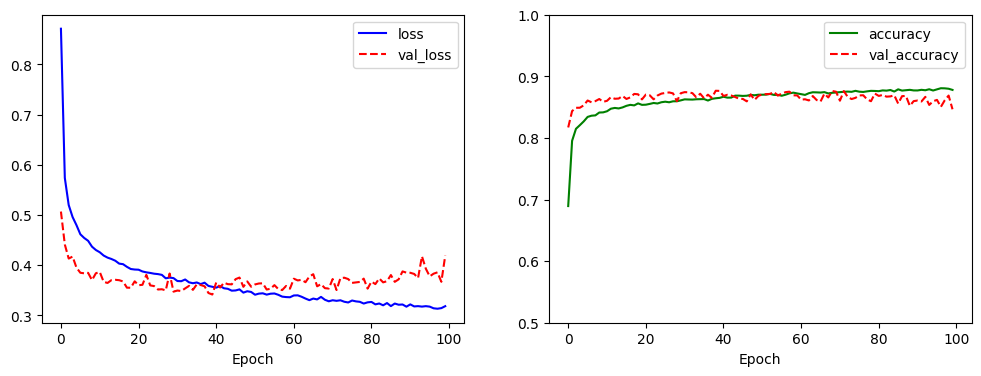

In [ ]:
# 훈련과정 시각화
plt.figure(figsize=(12, 4))

# Loss 그래프
# loss는 수치이므로 1을 넘어갈 수 있음 -> 확률이랑 착각 ㄴㄴ
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

# Accuracy 그래프
# 확률 값임
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5, 1)
plt.legend()

plt.show()

# (5) Evaluation

In [ ]:
# 테스트 결과 확인 
loss, accuracy = model.evaluate(X_test, y_test)
print('loss : ', loss)
print('accuracy : ', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.4457 - accuracy: 0.8412
loss :  0.44573724269866943
accuracy :  0.8411999940872192


In [ ]:
# 모델 예측
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 2ms/step


313/313 [==============================] - 1s 2ms/step - loss: 0.4457 - accuracy: 0.8412
Accuracy: 0.8411999940872192
F1-Score: 0.8412
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1000
           1       0.99      0.96      0.97      1000
           2       0.65      0.85      0.74      1000
           3       0.87      0.88      0.88      1000
           4       0.87      0.47      0.61      1000
           5       0.89      0.98      0.93      1000
           6       0.58      0.75      0.65      1000
           7       0.90      0.94      0.92      1000
           8       0.96      0.97      0.96      1000
           9       0.99      0.86      0.92      1000

    accuracy                           0.84     10000
   macro avg       0.86      0.84      0.84     10000
weighted avg       0.86      0.84      0.84     10000



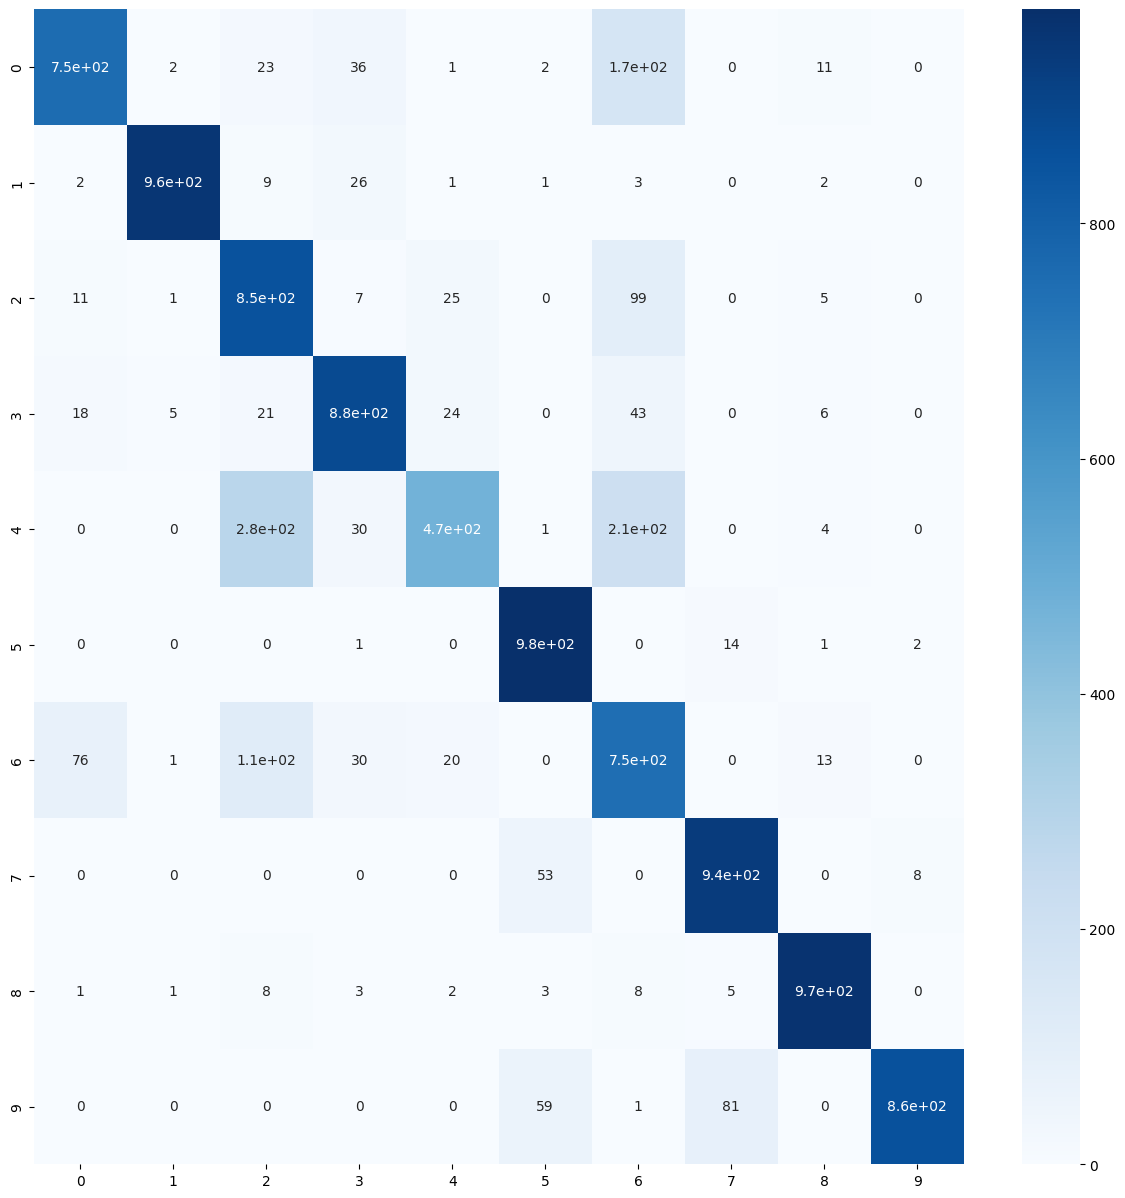

In [ ]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))


plt.figure(figsize=(15, 15))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()